In [68]:
# Load dependences
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import datetime
import requests
import urllib
import random
import folium
import gpxpy
import sys
import os
from shapely.geometry import Point, Polygon
from mpl_toolkits.basemap import Basemap
from datetime import timedelta, datetime

%matplotlib inline

In [69]:
# Path
path = os.path.dirname('__file__')

In [70]:
# Read GPX data
def read_gpx(file: str) -> pd.DataFrame:
    df = None
    points = []
    with open(file) as f:
        gpx = gpxpy.parse(f)
    for segment in gpx.tracks[0].segments:
        for p in segment.points:
            points.append({
                'time': p.time,
                'latitude': p.latitude,
                'Longitude': p. longitude,
                'elevation': p.elevation
            })
    df = pd.DataFrame.from_records(points)
    return df

In [71]:
# Read as dataframes
data_path_dic = {
    'recovery_01': os.path.join(path, './data_raw/recovery.01-Mar-2022-1533.gpx'),
    'recovery_05': os.path.join(path, './data_raw/recovery.05-Mar-2022.1025.gpx'),
    'recovery_25': os.path.join(path, './data_raw/recovery.25-May-2022-0907.gpx'),
    'cocorollo': os.path.join(path, './data_created/cocorollo.gpx'),
    'euro': os.path.join(path, './data_created/euro.gpx'),
    'frisby': os.path.join(path, './data_created/frisby.gpx'),
    'parques': os.path.join(path, './data_created/parques.gpx')
}

df_01 = read_gpx(data_path_dic["recovery_01"])
df_05 = read_gpx(data_path_dic["recovery_05"])
df_25 = read_gpx(data_path_dic["recovery_25"])
df_cocorollo = read_gpx(data_path_dic["cocorollo"])
df_euro = read_gpx(data_path_dic["euro"])
df_frisby = read_gpx(data_path_dic["frisby"])
df_parques = read_gpx(data_path_dic["parques"])

In [72]:
# Información dataframe del primer recovery
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype                        
---  ------     --------------  -----                        
 0   time       3 non-null      datetime64[ns, SimpleTZ("Z")]
 1   latitude   3 non-null      float64                      
 2   Longitude  3 non-null      float64                      
 3   elevation  3 non-null      float64                      
dtypes: datetime64[ns, SimpleTZ("Z")](1), float64(3)
memory usage: 224.0 bytes


In [73]:
df_01.head()

,time,latitude,Longitude,elevation
0,2022-03-01 20:33:48+00:00,6.297476,-75.578192,1668.879307
1,2022-03-01 20:33:49+00:00,6.297476,-75.578146,1668.386143
2,2022-03-01 20:33:57+00:00,6.297460,-75.578169,1667.904453


In [74]:
# Información dataframe del segundo recovery
df_05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18593 entries, 0 to 18592
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype                        
---  ------     --------------  -----                        
 0   time       18593 non-null  datetime64[ns, SimpleTZ("Z")]
 1   latitude   18593 non-null  float64                      
 2   Longitude  18593 non-null  float64                      
 3   elevation  18593 non-null  float64                      
dtypes: datetime64[ns, SimpleTZ("Z")](1), float64(3)
memory usage: 581.2 KB


In [75]:
df_05.head()

,time,latitude,Longitude,elevation
0,2022-03-04 00:04:34+00:00,6.180893,-75.577296,1589.639492
1,2022-03-04 00:04:35+00:00,6.180912,-75.577295,1588.165859
2,2022-03-04 00:04:43+00:00,6.180921,-75.577312,1591.435879
3,2022-03-04 00:04:46+00:00,6.180897,-75.577270,1587.116055
4,2022-03-04 00:04:48+00:00,6.180874,-75.577276,1586.772305


In [76]:
# Información dataframe del tercer recovery
df_25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype                        
---  ------     --------------  -----                        
 0   time       658 non-null    datetime64[ns, SimpleTZ("Z")]
 1   latitude   658 non-null    float64                      
 2   Longitude  658 non-null    float64                      
 3   elevation  658 non-null    float64                      
dtypes: datetime64[ns, SimpleTZ("Z")](1), float64(3)
memory usage: 20.7 KB


In [77]:
df_25.head(-5)

,time,latitude,Longitude,elevation
0,2022-05-25 21:24:46.433000+00:00,6.208559,-75.571630,1558.78
1,2022-05-26 14:05:32.284000+00:00,6.268901,-75.593216,1548.51
2,2022-05-26 14:05:34+00:00,6.268870,-75.593087,1551.91
3,2022-05-26 14:05:36+00:00,6.268792,-75.593007,1551.53
4,2022-05-26 14:05:37+00:00,6.268722,-75.592900,1551.37
...,...,...,...,...
648,2022-05-26 14:31:45+00:00,6.209025,-75.571180,1560.10
649,2022-05-26 14:31:52+00:00,6.208937,-75.571224,1559.41
650,2022-05-26 14:31:59+00:00,6.208847,-75.571239,1553.37
651,2022-05-26 14:32:09+00:00,6.208779,-75.571305,1551.84


In [78]:
# Graficar rutas
def graph_route(dataframe):
    points = gpd.points_from_xy(dataframe["Longitude"], dataframe["latitude"])
    map = gpd.GeoDataFrame (dataframe, geometry=points) 
    map.plot()

    plt.show()

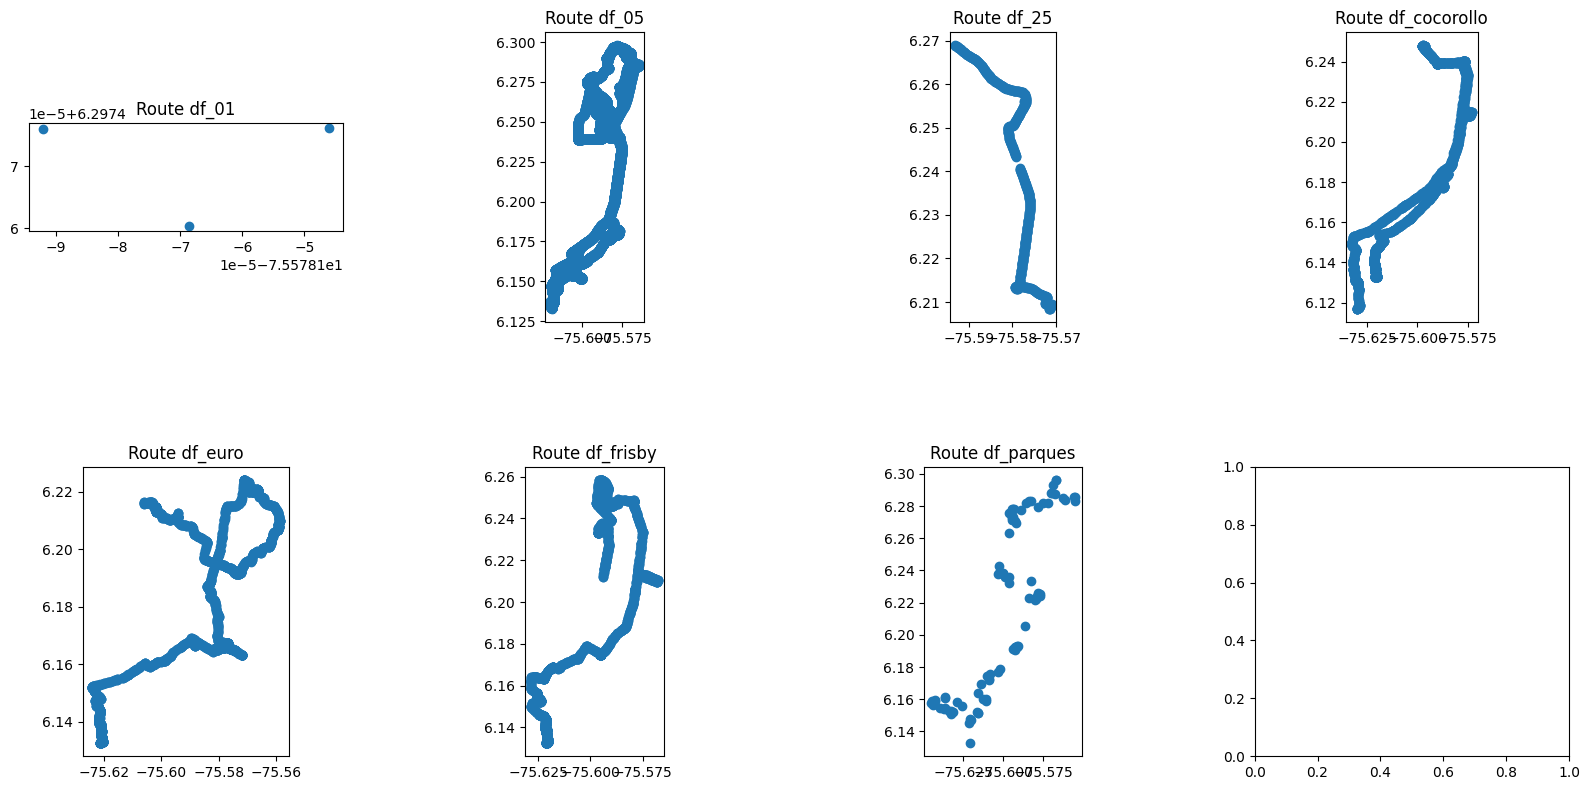

In [79]:
dataframes = [df_01, df_05, df_25, df_cocorollo, df_euro, df_frisby, df_parques]

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for i, dataframe in enumerate(dataframes):
    dataframe_name = [name for name in globals() if globals()[name] is dataframe][0]
    points = gpd.points_from_xy(dataframe["Longitude"], dataframe["latitude"])
    gdf = gpd.GeoDataFrame(dataframe, geometry=points)

    # Se calculan las filas y columnas dentro del grafico
    row, col = (i // 4), (i % 4)

    # Ruta de cada grafica
    ax = axs[row, col]
    ax.set_title(f"Route {str(dataframe_name)}")  # Set the title of the subplot
    gdf.plot(ax=ax)

# Se mejora las graficas
fig.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Show the plot
plt.show()

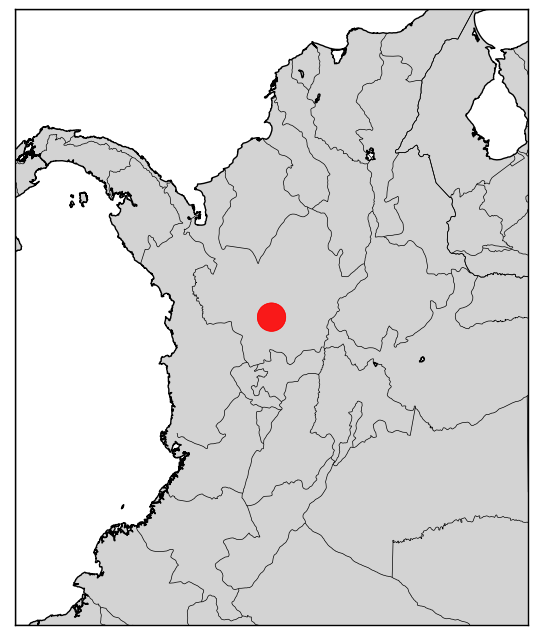

In [80]:
# Se busca de que parte del mundo son los datos, se llega a que todos son de Medellín

data = df_01

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h',
            lat_0=data['latitude'].mean(), lon_0=data['Longitude'].mean(),
            width=1e6, height=1.2e6)

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='lightgray', lake_color='white')
m.drawmapboundary(fill_color='white')

x, y = m(data['Longitude'].values, data['latitude'].values)
m.scatter(x, y, s=data['elevation'].values, c='red', alpha=0.5, marker='.', linewidth=0.5)

plt.show()

In [90]:
def get_min_max_values(dataframe):
    max_elevation, min_elevation = dataframe['elevation'].max(), dataframe['elevation'].min()
    max_latitude, min_latitude = dataframe['latitude'].max(), dataframe['latitude'].min()
    max_longitude, min_longitude = dataframe['Longitude'].max(), dataframe['Longitude'].min()

    return max_elevation, min_elevation, max_latitude, min_latitude, max_longitude, min_longitude

data = df_05
data_string = [name for name in globals() if globals()[name] is data][0]

max_elevation, min_elevation, max_latitude, min_latitude, max_longitude, min_longitude = get_min_max_values(data)

print(f'Max and Min values of {data_string}')
print('elevation', max_elevation, min_elevation)
print('latitude', max_latitude, min_latitude)
print('longitude', max_longitude, min_longitude)

Max and Min values of df_05
elevation 1781.807949066162 1439.328281402588
latitude 6.297835945157611 6.132790722560909
longitude -75.5642432068247 -75.6205232950806


### Se simulan datos para el tiempo de datos no usados

In [82]:
dfs_without_time = [df_cocorollo, df_euro, df_frisby, df_parques]

In [88]:
df_random_date = []

for df in dfs_without_time:
    start_date = datetime.strptime('2022-01-01 00:00:00+0300', '%Y-%m-%d %H:%M:%S%z')
    end_date = datetime.strptime('2023-12-31 23:59:00+0300', '%Y-%m-%d %H:%M:%S%z')
    random_date_1 = start_date + (end_date - start_date) * random.random()
    random_date_2 = random_date_1 + timedelta(hours=random.randint(1,3), minutes=random.randint(0, 59))
    for raw in range(df.shape[0]-1):
        if raw == 0:
            df.loc[raw, 'time'] = random_date_1
        else:
            df.loc[raw, 'time'] = df.loc[raw-1, 'time'] + timedelta(seconds=random.randint(0, 10))

In [89]:
df_cocorollo.head(-5)

,time,latitude,Longitude,elevation,geometry
0,2023-04-14 10:53:02.958752+03:00,6.132732,-75.620666,None,POINT (-75.62067 6.13273)
1,2023-04-14 10:53:56.958752+03:00,6.132740,-75.620670,None,POINT (-75.62067 6.13274)
2,2023-04-14 10:54:39.958752+03:00,6.132750,-75.620680,None,POINT (-75.62068 6.13275)
3,2023-04-14 10:55:29.958752+03:00,6.132760,-75.620690,None,POINT (-75.62069 6.13276)
4,2023-04-14 10:55:47.958752+03:00,6.132770,-75.620700,None,POINT (-75.62070 6.13277)
...,...,...,...,...,...
1811,2023-04-15 01:42:13.958752+03:00,6.117180,-75.629590,None,POINT (-75.62959 6.11718)
1812,2023-04-15 01:43:03.958752+03:00,6.117090,-75.629720,None,POINT (-75.62972 6.11709)
1813,2023-04-15 01:43:51.958752+03:00,6.117000,-75.629880,None,POINT (-75.62988 6.11700)
1814,2023-04-15 01:44:26.958752+03:00,6.116940,-75.629980,None,POINT (-75.62998 6.11694)
